In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import norm
%matplotlib inline

In [ ]:
Phi = norm.cdf
N = 30
X = np.linspace(0,3,100)
Y = np.round(N*(Phi(X)-0.5),0)
D = np.diff(Y)
support = [X[k] for k in range(1,len(X)-1) if D[k-1]==1] 
support+=[-k for k in support]
support=[(1*s) for s in support]
L = len(support)
support.sort()
valeurs =  np.ones_like(support)/N
AN = [int(1000*a)/1000 for a in support if a>0]


## Un premier exemple

## Un second exemple

[0.06, 0.151, 0.212, 0.303, 0.393, 0.484, 0.575, 0.696, 0.787, 0.909, 1.06, 1.212, 1.393, 1.666, 2.151]


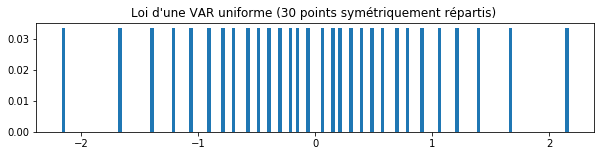

In [191]:
plt.figure(figsize=(10,2));
plt.title("Loi d'une VAR uniforme ({0} points symétriquement répartis) ".format(L))
print(AN)
plt.bar(support,valeurs, width=0.03);

1. La loi est **uniforme** : $P(X=x_k)=P(X=x_j)$ pour $x_j,x_k$ dans $X(\Omega)$.
2. La loi **n'est pas équirépartie** : les $x_k$ sont plus concentrés autour de $0.$

In [165]:
serie = pd.DataFrame({"xk":support})
sigma = serie.std(ddof=0)

nbins = 10
#bins = np.linspace(a,b,int((b-a)/sigma))

def histo(nbins):
    
    Phi = norm.cdf
    N = 30
    X = np.linspace(0,3,100)
    Y = np.round(N*(Phi(X)-0.5),0)
    D = np.diff(Y)
    support = [X[k] for k in range(1,len(X)-1) if D[k-1]==1] 
    support+=[-k for k in support]
    support=[(1*s) for s in support]
    a = min(support)
    b = max(support)
    L = len(support)
    support.sort()
    serie.hist(normed=True,ec='white',alpha=0.40,bins=nbins);
    x = np.linspace(min(support),max(support))
    button1= widgets.RadioButtons(
    options={"Avec la densité":1,"Sans la densité":0})
    plt.plot(x,norm.pdf(x,scale = sigma))
    plt.ylim([0,0.7])
    s = np.round((b-a)/nbins,2)
    plt.title("{0} classes. Unité d'écart : {1}".format(nbins,s))

In [166]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [170]:
interact(histo,nbins=widgets.IntSlider(min=1,max=61,step=1,value=61));

interactive(children=(IntSlider(value=61, description='nbins', max=61, min=1), Output()), _dom_classes=('widget-interact',))